### BANK CUSTOMERS RETIREMENT PREDICTIONS USING SUPPORT VECTOR MACHINES


# STEP #1: PROBLEM STATEMENT

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on his/her features. Features are his/her age and net 401K savings (retirement savings in the U.S.). You though that Support Vector Machines can be a great candidate to solve the problem. 

# STEP #2: IMPORTING LIBRARIES AND DATA

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
dataset=pd.read_csv('Bank_Customer_retirement.csv')

In [25]:
dataset

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1
...,...,...,...,...
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1


In [26]:
dataset.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [27]:
dataset.shape

(500, 4)

In [28]:
dataset.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [29]:
dataset.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


# STEP #3: VISUALIZING THE DATA

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


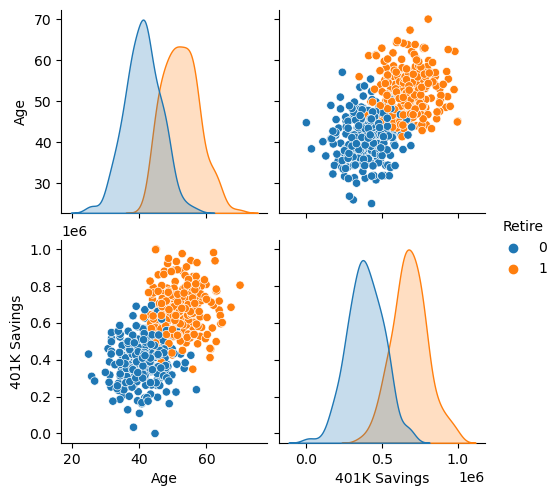

In [30]:
sns.pairplot(dataset,hue='Retire',vars=['Age','401K Savings'])

<Axes: ylabel='count'>

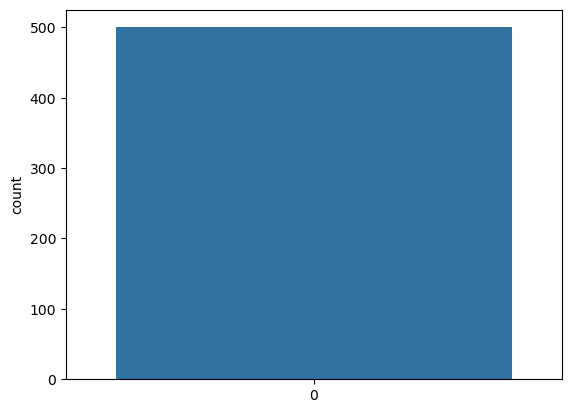

In [31]:
sns.countplot(dataset['Retire'],label='Retirement')

# STEP #4: MODEL TRAINING 

In [32]:
dataset.drop(['Customer ID'],axis=1,inplace=True)

In [33]:

# Let's drop the target label coloumns


In [34]:
dataset.head()

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1


In [35]:
X=dataset.drop('Retire',axis=1)

In [36]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [37]:
y=dataset['Retire']

In [38]:
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [39]:
X.shape

(500, 2)

In [40]:
y.shape

(500,)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [42]:
X_train.shape,X_test.shape

((400, 2), (100, 2))

In [44]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC()

# STEP #5: EVALUATING THE MODEL

In [45]:
y_predict=svc_model.predict(X_test)

<Axes: >

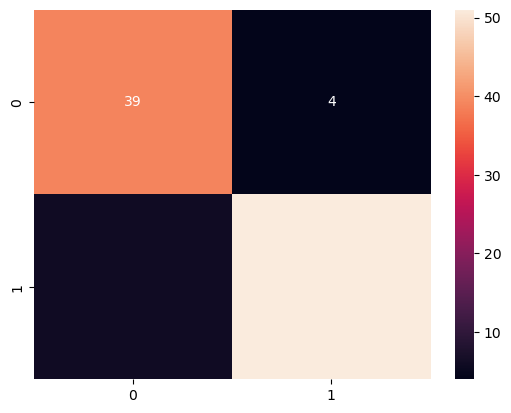

In [47]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)

In [48]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.93      0.89      0.91        57

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



# STEP #6: IMPROVING THE MODEL

In [49]:
min_train=X_train.min()

In [50]:
range_train=(X_train-min_train).max()

In [51]:
X_train_scaled=(X_train-min_train)/range_train

<Axes: xlabel='Age', ylabel='401K Savings'>

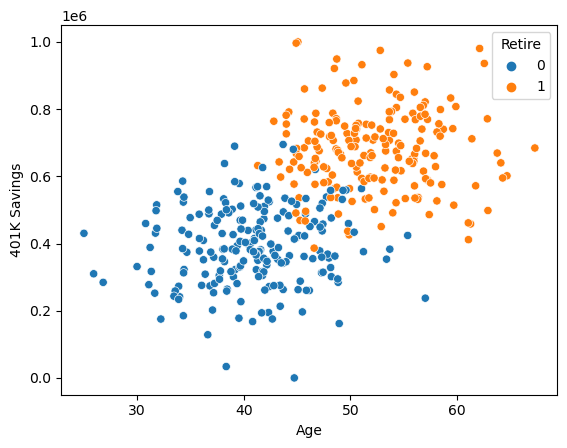

In [52]:
sns.scatterplot(x=X_train['Age'],y=X_train['401K Savings'],hue=y_train)

<Axes: xlabel='Age', ylabel='401K Savings'>

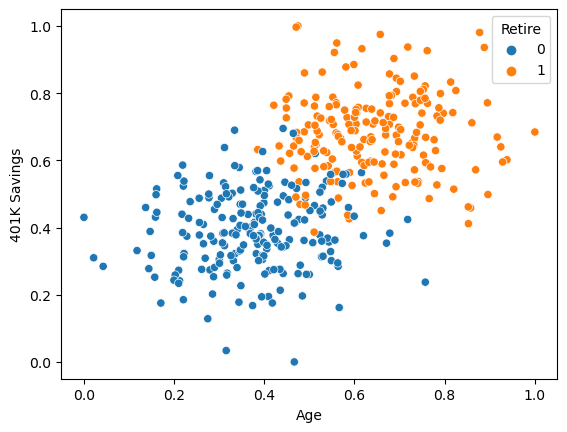

In [53]:
sns.scatterplot(x=X_train_scaled['Age'],y=X_train_scaled['401K Savings'],hue=y_train)

In [54]:
min_test=X_test.min()
range_test=(X_test-min_test).max()
X_test_scaled=(X_test-min_test)/range_test

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model=SVC()
svc_model.fit(X_train_scaled,y_train)

SVC()

In [56]:
y_predict=svc_model.predict(X_test_scaled)

In [57]:
cm=confusion_matrix(y_test,y_predict)

<Axes: >

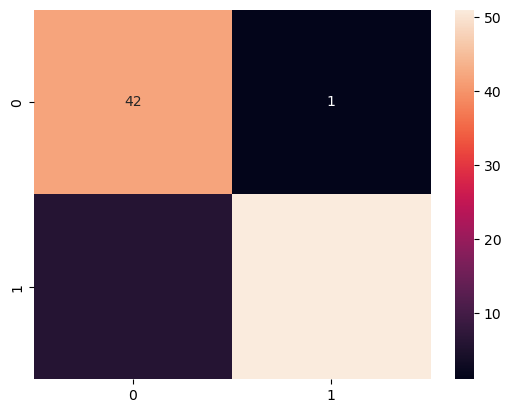

In [58]:
sns.heatmap(cm,annot=True)

In [59]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



# IMPROVING THE MODEL - PART 2

In [60]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [63]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.512 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.525 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.512 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [64]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [65]:
grid_predict=grid.predict(X_test_scaled)

In [66]:
cm=confusion_matrix(y_test,grid_predict)

<Axes: >

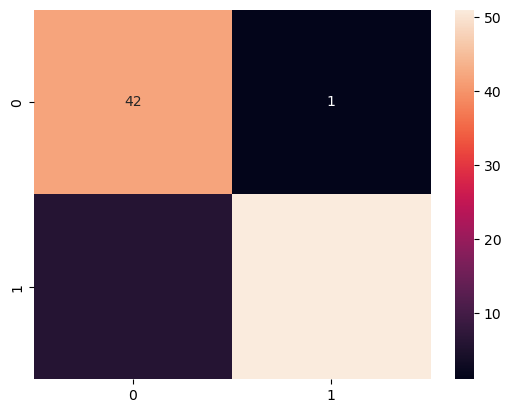

In [67]:
sns.heatmap(cm,annot=True)

In [68]:
print(classification_report(y_test,grid_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.94        57

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100

